In [1]:
# Cell 1: Verify environment
from windrose import WindroseAxes  # Must be at the TOP of your notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [2]:
df = pd.read_csv('../data/raw/benin-malanville.csv')
print("Data shape:", df.shape)
df.head()

Data shape: (525600, 19)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [3]:
display(df.describe())
print(df.isna().sum()/len(df)*100)

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


Timestamp          0.0
GHI                0.0
DNI                0.0
DHI                0.0
ModA               0.0
ModB               0.0
Tamb               0.0
RH                 0.0
WS                 0.0
WSgust             0.0
WSstdev            0.0
WD                 0.0
WDstdev            0.0
BP                 0.0
Cleaning           0.0
Precipitation      0.0
TModA              0.0
TModB              0.0
Comments         100.0
dtype: float64


In [4]:
# Fix negative radiation
df[['GHI','DNI','DHI']] = df[['GHI','DNI','DHI']].clip(lower=0)

# Impute missing values
df.fillna({
    'GHI': df['GHI'].median(),
    'Tamb': df['Tamb'].mean(),
    'WS': df['WS'].median()
}, inplace=True)

print(" Data cleaned")

 Data cleaned


In [25]:
# Z-scores for key columns
numeric_cols = ['GHI','DNI','DHI','ModA','ModB','WS','WSgust']
z_scores = np.abs(stats.zscore(df[numeric_cols]))
df['is_outlier'] = (z_scores > 3).any(axis=1)

print(f" Outliers found: {df['is_outlier'].sum()} ({df['is_outlier'].mean()*100:.1f}%)")

 Outliers found: 7893 (1.5%)


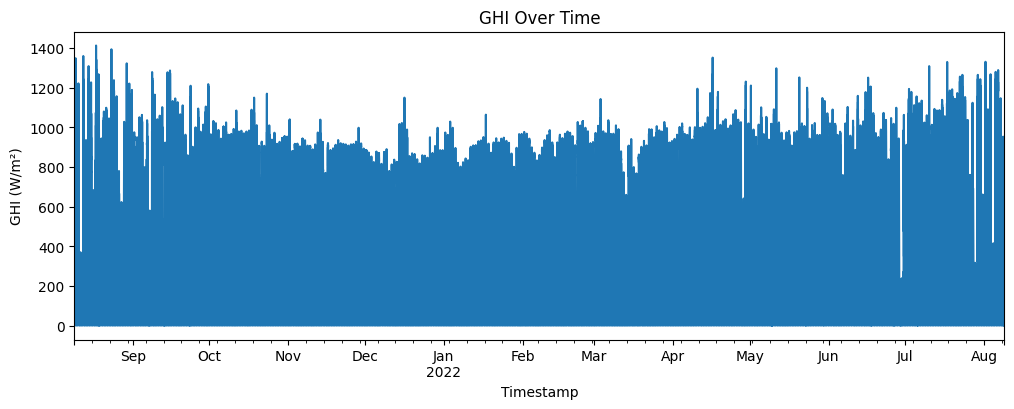

In [26]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp')['GHI'].plot(
    figsize=(12,4),
    title='GHI Over Time',
    ylabel='GHI (W/m²)'
)
plt.show()

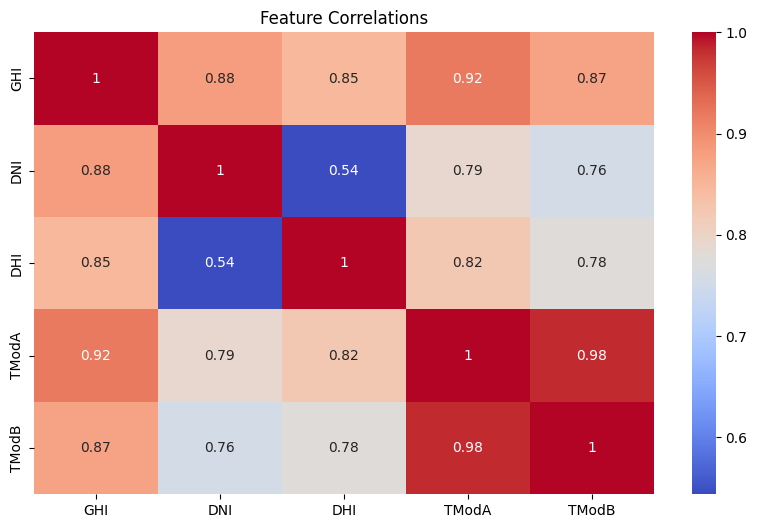

In [27]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['GHI','DNI','DHI','TModA','TModB']].corr(),
            annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()

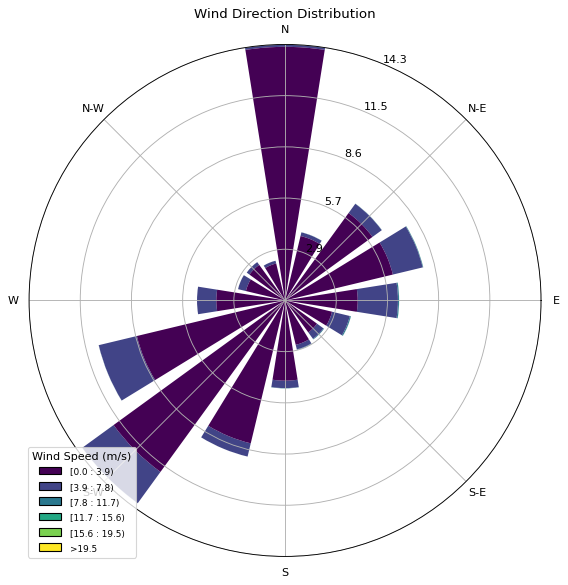

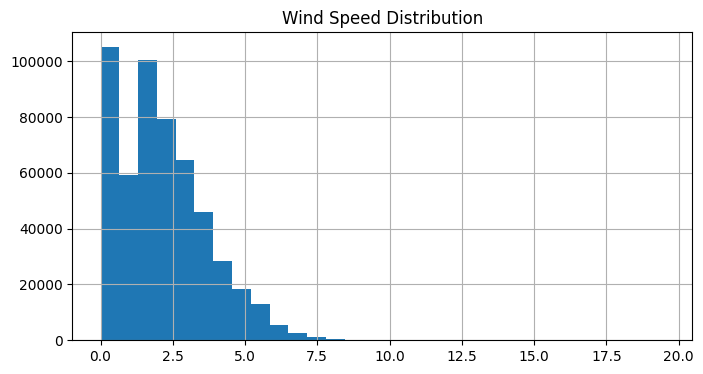

In [5]:
# Wind rose
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, bins=6)
ax.set_legend(title='Wind Speed (m/s)')
plt.title('Wind Direction Distribution')
plt.show()

# Wind speed histogram
plt.figure(figsize=(8,4))
df['WS'].hist(bins=30)
plt.title('Wind Speed Distribution')
plt.show()

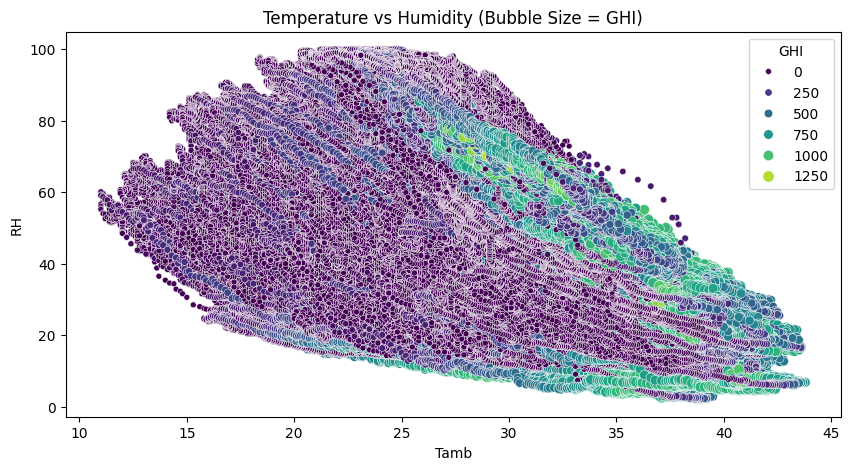

In [29]:
plt.figure(figsize=(10,5))
sns.scatterplot(
    data=df,
    x='Tamb',
    y='RH',
    size='GHI',
    hue='GHI',
    palette='viridis'
)
plt.title('Temperature vs Humidity (Bubble Size = GHI)')
plt.show()

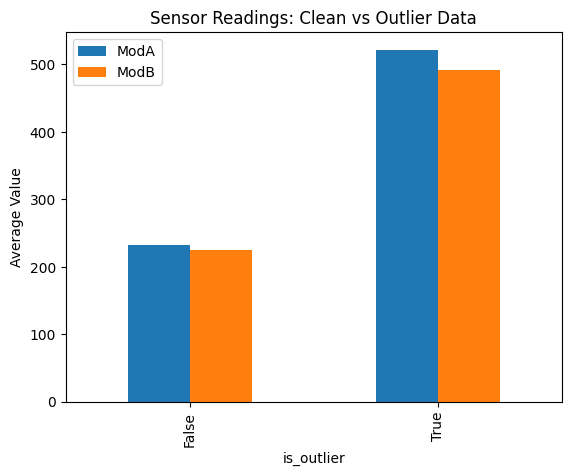

In [30]:
clean_impact = df.groupby('is_outlier')[['ModA','ModB']].mean()
clean_impact.plot(kind='bar')
plt.title('Sensor Readings: Clean vs Outlier Data')
plt.ylabel('Average Value')
plt.show()

In [33]:
df_clean = df[~df['is_outlier']]
df_clean.to_csv('../data/processed/benin_clean.csv')
print(f"💾 Cleaned data saved. Removed {len(df)-len(df_clean)} outliers")

💾 Cleaned data saved. Removed 7893 outliers
